The goal of this notebook is to explore how markers can be used to guide the algorithm finding the optimal window within a marker range. This is also useful for looking at marker ranges across an entire graph

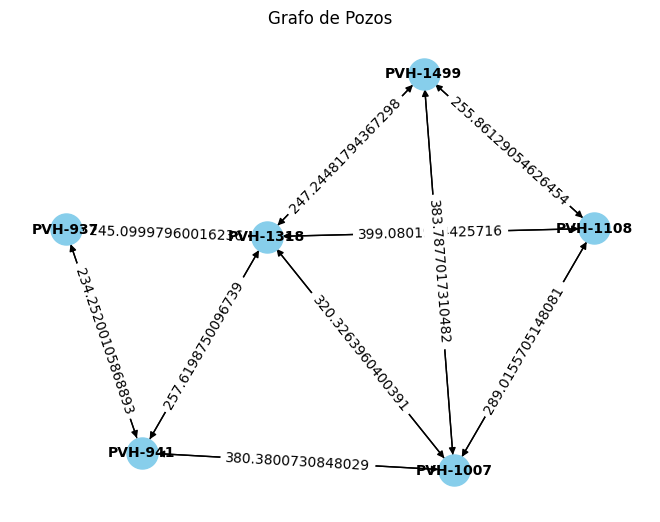

In [1]:
import numpy as np
from graph_setup import G

In [2]:
node_name1 = "PVH-937"
node_name2 = "PVH-941"


mark1 = G.nodes[node_name1]["markers"].copy()
mark2 = G.nodes[node_name2]["markers"].copy()


common_markers = mark1.merge(mark2, on="Mkr")
common_markers = common_markers.rename(columns={"Depth_x": node_name1})
common_markers = common_markers.rename(columns={"Depth_y": node_name2})

print(common_markers)


  Mkr    PVH-937    PVH-941
0   K  1075.1807  1073.5878
1  L2  1290.3693  1290.3293


In [3]:
marker_names = common_markers["Mkr"]
mark_depths1 = common_markers[node_name1].tolist()
mark_depths2 = common_markers[node_name2].tolist()

def create_subs(arr):
    result = [(5, arr[0])]
    
    # Add pairs of consecutive elements
    for i in range(len(arr) - 1):
        result.append([arr[i], arr[i + 1]])
    
    # Add the final pair with infinity
    if len(arr) > 0:
        result.append([arr[-1], 6000])
    
    return result

sub1 = create_subs(mark_depths1)
sub2 = create_subs(mark_depths2)

print(sub1)
print(sub2)

[(5, 1075.1807), [1075.1807, 1290.3693], [1290.3693, 6000]]
[(5, 1073.5878), [1073.5878, 1290.3293], [1290.3293, 6000]]


In [4]:
from calc_functions import optimal_window
m_tol = 5
for i in range(len(sub1)):
    bounds = [(sub1[i][0]-m_tol, sub1[i][0]+m_tol),
              (sub1[i][1]-m_tol, sub1[i][1]+m_tol),
              (sub2[i][0]-m_tol, sub2[i][0]+m_tol),
              (sub2[i][1]-m_tol, sub2[i][1]+m_tol)]
    print(bounds)
    

    opt, error = optimal_window(G, node_name1, node_name2, bounds)

    print(f"Optimal windows: {opt}")
    print(f"Minimum error: {error}")




[(0, 10), (1070.1807, 1080.1807), (0, 10), (1068.5878, 1078.5878)]
100%|██████████| 50/50 [00:16<00:00,  3.09trial/s, best loss: 1.4624999999999773]
Optimal windows: [2.0, 1078.5, 7.0, 1070.5]
Minimum error: 1.4624999999999773
[(1070.1807, 1080.1807), (1285.3693, 1295.3693), (1068.5878, 1078.5878), (1285.3293, 1295.3293)]
100%|██████████| 50/50 [00:21<00:00,  2.30trial/s, best loss: 1.2930555555555605]
Optimal windows: [1077.5, 1290.5, 1077.5, 1290.5]
Minimum error: 1.2930555555555605
[(1285.3693, 1295.3693), (5995, 6005), (1285.3293, 1295.3293), (5995, 6005)]
100%|██████████| 50/50 [01:04<00:00,  1.28s/trial, best loss: 71.14159090909092]
Optimal windows: [1294.0, 6004.5, 1290.5, 5999.0]
Minimum error: 71.14159090909092


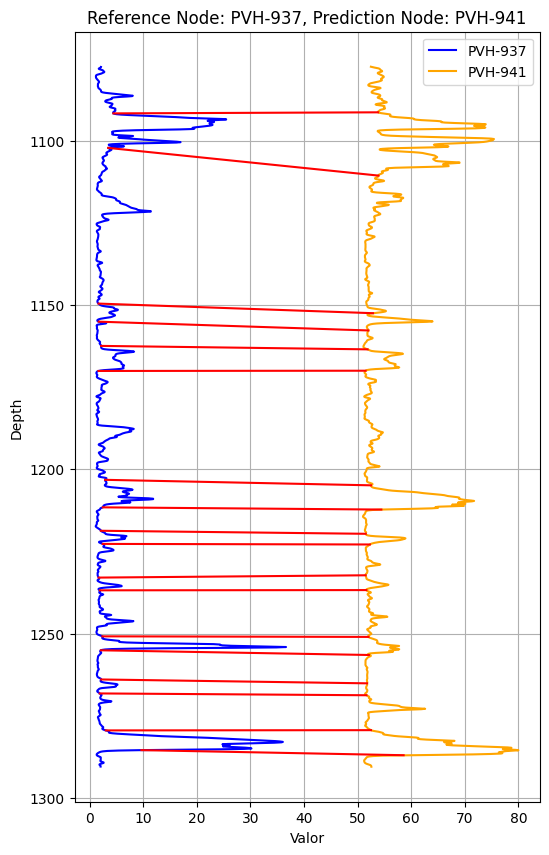

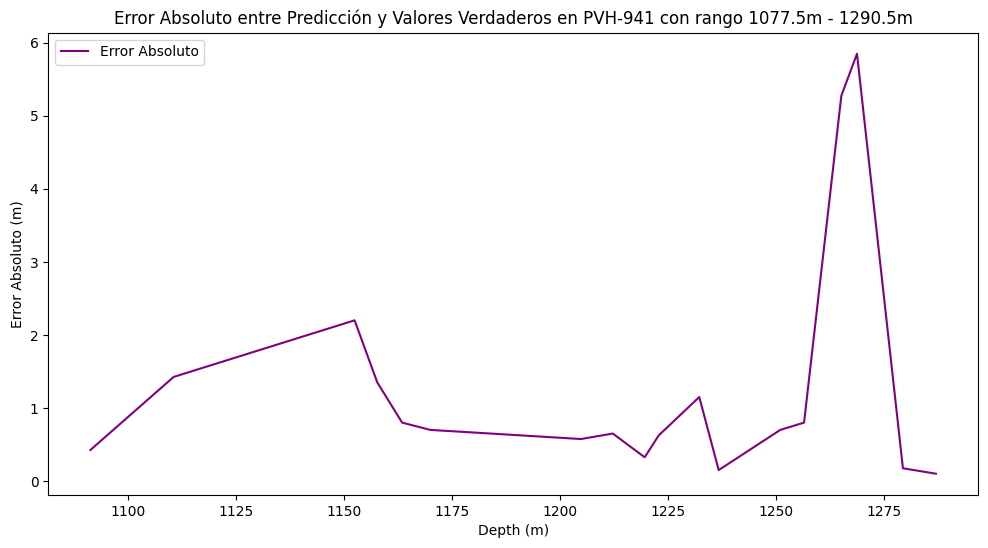

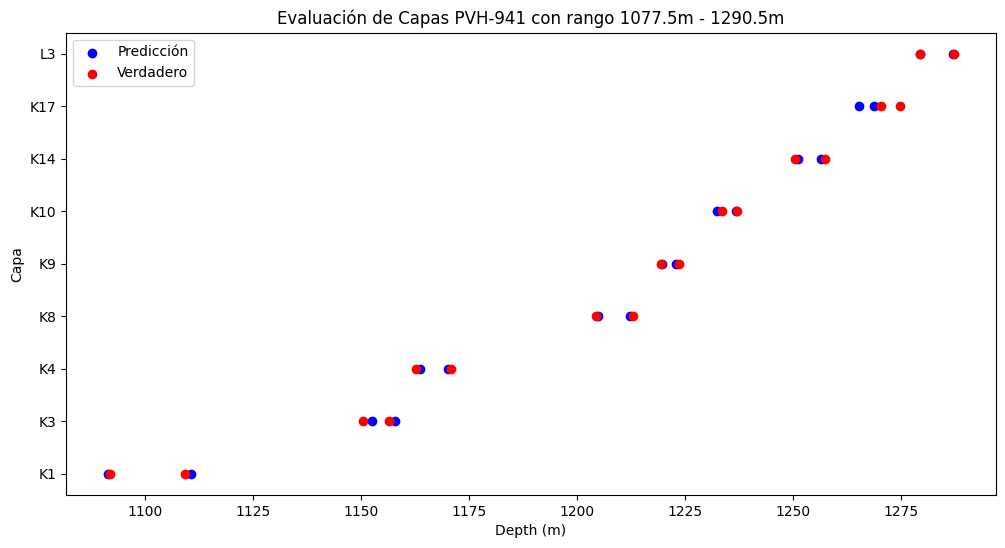

(1.2930555555555605, 4.212048611111115)

In [6]:
from calc_functions import windows_test
windows_test(G, node_name1, node_name2, [1077.5, 1290.5, 1077.5, 1290.5], show_plots=True)